### Computer Session 3

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# A first geometric optimisation problem

We consider a convex polygon inscribed in the unit disk in $\R^d$. In other
words, we consider $0= \theta_1\leq \theta_2\leq \dots\leq \theta_n< 2\pi$, and
the associated polygon is the convex hull of $\{e^{i\theta_k}\}_{k=1,\dots n}$.

Find numerically the polygon that maximize the perimeter. Your function to maximize must
take, as an argument, the geometric quantities of the problem: you should fix the number of sides or of angles. Then, computing the
perimeter, minimise it under constraints, using using (for instance) a penalised
method (Exercise 3.2). Compute the gradient by finite differences.

Plot your results graphically.


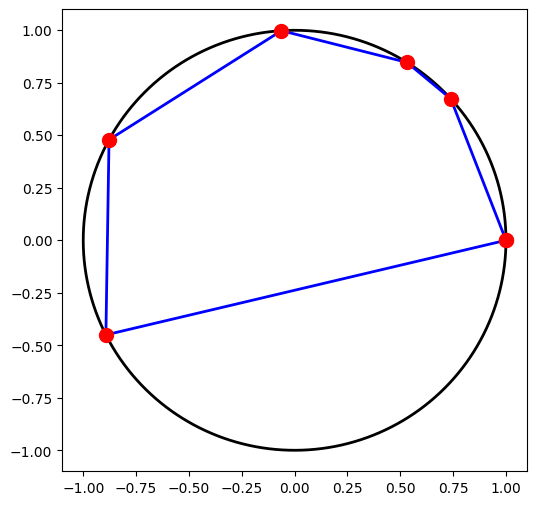

In [71]:
# Create a figure and axis
cercle = np.linspace(0,2*np.pi,1000)
plt.figure(figsize=(6, 6))
plt.plot(np.cos(cercle), np.sin(cercle), color='black', lw=2)

# Create a polygon with 6 vertices
n = 6
theta = np.random.random(n)
theta = np.concatenate(([0], np.cumsum(theta / np.sum(theta) * 2 * np.pi)))
x = np.cos(theta) 
y = np.sin(theta)
plt.plot(x, y, color='blue', lw=2)
plt.scatter(x, y, color='red', s=100, zorder=10)

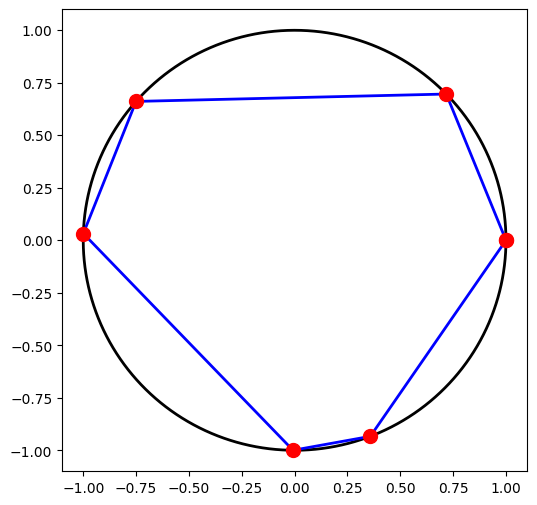

: 

In [ ]:
# Calculate the perimeter of the polygon
def polygon_param(theta):
    h = 1/2 * np.sqrt(2 * (1 - np.cos(theta[1:] - theta[:-1])))
    return np.sum(2 * np.sqrt(1 - h**2))

# Gradient ascent to maximize the perimeter
delta = 1e-5  # Small perturbation for numerical gradient
n = 6
theta = np.random.random(n)
theta = np.concatenate(([0], np.cumsum(theta / np.sum(theta) * 2 * np.pi)))


grad = np.zeros_like(theta)
theta_opt = np.copy(theta)  # Store optimized angles
for i in range(n-1):  # Compute gradient for each angle
    delta_theta = np.zeros_like(theta)
    delta_theta[i] = delta
    grad[i] = (polygon_perimeter(theta + delta_theta) - polygon_perimeter(theta)) / delta
theta_opt[1:] += tau * grad[1:]  # Update angles (excluding the first fixed angle)
theta_opt = np.concatenate(([0], np.sort(theta_opt[1:])))  # Ensure angles remain sorted

# Compute optimized polygon coordinates
x_opt = np.cos(theta_opt)
y_opt = np.sin(theta_opt)

# Plot the optimized polygon
plt.figure(figsize=(6, 6))
plt.plot(np.cos(cercle), np.sin(cercle), color='black', lw=2)  # Unit circle
plt.plot(x_opt, y_opt, color='blue', lw=2)  # Optimized polygon
plt.scatter(x_opt, y_opt, color='red', s=100, zorder=10)  # Vertices
plt.show()

## Projection on convex sets $K=\{x\in\R^d, Cx\leq b\}$

Let compute the projection of a point $x_0$ on the convex set $K=\{x\in\R^d,
Cx\leq b\}$, where $C$ is a matrix and $b$ is a vector. The projection is
defined as: 
$$
\Pi_K(x_0) = \arg\min_{x\in K} \|x-x_0\|^2.$$

1. Define the projection operator when $C=\mathrm{Id}$ and $b=0$. We denote by $\Pi_{\mathbb{K}_-}$ this projection operator. 
   How can you compute it using Python?
2. Write the KKT conditions for the quadratic optimization problem when $K=\{x\in\R^d, Cx\leq b\}$: 
    $$
    \min_{x\in K}\left\{ \frac12 ||x||^2-\langle x_0,x\rangle\right\}.$$
    How is it related to the projection operator?
3. Show that, for all $\tau>0$, we have 
    $$\forall \mu\in\mathrm{K}_-, \quad
    \langle\lambda^*-\mu,\lambda^*-(\lambda^*+\tau(b-Cx^*))\rangle\leq 0.$$
    Express this condition in terms of the projection operator
    $\Pi_{\mathbb{K}_-}$.
4. Implement Uzawa’s algorithm to compute numerically the projection operator on $K=\{x\in\R^d, Cx\leq b\}$:
    $$\lambda_{n+1}=\Pi_{\mathbb{K}_-}(\lambda_n+\tau(b-Cx_n)),\text{ then }
    x_{n+1}=C^T\lambda_{n+1}+x_0.$$
5. You can adapte the code of the first exercise to use the projection operator. 

In [6]:
x0 = np.zeros(10)

C = np.identity(x0.shape[0])
b = 0
                
                
def PiK_(x0):
    x = []
    for _ in range(100):
        x.append(np.random.random(x0.shape[0])*(np.dot(C,x)<=b))
    return np.argmin(np.norm(x-x0**2))

## The polygonal isoperimetric inequality

Given an perimeter constraint $L$ and a fixed number of sides $N$, what is the polygon with $N$ sides that maximises the enclosed area? We represent a polygon in $\R^2$ by a collection of point $\{(x_i,y_i)\}_{i=1,\dots,N}$, ordered in a counterclockwise fashion.
 We admit that the area of this polygon is given by 
$$A=\frac12\sum_{k=1}^N (x_ky_{k+1}-y_{k}x_{k+1}).$$


You must enter as parameters the number of sides of the polygon you seek and use whichever algorithm you see fit (typically, a Uzawa method).

Plot your results graphically.

## The obstacle problem

Let $g$ be a given continuous function on the interval $[0,1]$. We consider an \textit{obstacle problem}: find a function $ u: [0,1] \longrightarrow \mathbb{R}$ such that:

$$
\left\{
\begin{array}{ll}
-u''(x) \geq 1 & x \in (0,1) \\
u(x) \geq g(x) & x \in (0,1) \\
\left( -u''(x) - 1 \right)(u(x) - g(x)) = 0 & x \in (0,1) \\
u(0) = u(1) = 0 & \\
\end{array}
\right.
$$

The first equation represents a minimum concavity for the function $u$, the second equation represents the obstacle: $u$ must remain above $g$. The third equation expresses the fact that we must satisfy at least one of the two previous equations with equality: either we solve $-u''(x) = 1$, or $u(x) = g(x)$, and we are on the obstacle.

### Associated minimization problem

We discretize this problem by introducing a uniform mesh: $x_j = jh$, where $h$ is the step size of the mesh, and $j \in \{0, \dots, n+1\}$, with $n \geq 1$ an integer and $h = \frac{1}{n+1}$. Let $ g_j = g(x_j) $ for $ j \in \{0, \dots, n+1\} $. We seek values $ u_j = u(x_j) $ for $ j \in \{0, \dots, n+1\} $ such that:

$$
\left\{
\begin{array}{ll}
\displaystyle -\frac{u_{j-1} - 2u_j + u_{j+1}}{h^2} \geq 1 & j \in \{0, \dots, n+1\} \\
u_j \geq g_j & j \in \{0, \dots, n+1\} \\
\displaystyle \left( -\frac{u_{j-1} - 2u_j + u_{j+1}}{h^2} \right) (u_j - g_j) = 0 & j \in \{0, \dots, n+1\} \\
u_0 = u_{n+1} = 0 & \\
\end{array}
\right.
$$

Recall that $ -\frac{u_{j-1} - 2u_j + u_{j+1}}{h^2} $ is the finite difference approximation of $ -u''(x_j) $.

We introduce the matrix $ A \in S_n(\mathbb{R}) $, defined by:

$$
A = \frac{1}{h^2} \left( \begin{array}{ccccc}
2 & -1 & 0 & \dots & 0 \\
-1 & 2 & -1 & \vdots \\
0 & \ddots & \ddots & \ddots & 0 \\
\vdots & & -1 & 2 & -1 \\
0 & \dots & 0 & -1 & 2
\end{array} \right).
$$

We also define the column vectors $ b $ and $ g $ of $ \mathbb{R}^n $ as follows:

$$
b = \left( \begin{array}{c}
1 \\
\vdots \\
1
\end{array} \right), \quad g = \left( \begin{array}{c}
g_1 \\
\vdots \\
g_n
\end{array} \right).
$$

Recall that if $ u = \left( \begin{array}{c} u_1 \\ \vdots \\ u_n \end{array} \right) $, then

$$
u \text{ is a solution of (2)} \Longleftrightarrow u \text{ is a solution of } \left\{
\begin{array}{l}
\displaystyle \min_{v \in K} \left\{ \frac{1}{2}(Av, v) - (b, v) \right\} \\
K = \{v \in \mathbb{R}^n : v \geq g \}
\end{array}
\right.
$$

We define the function $J$ on $\mathbb{R}^n$ by:

$$
J(v) = \frac{1}{2} (Av, v) - (b, v).
$$

### Problem Resolution

Consider the specific case where $g(x) = \max \left( 0, 1 - 100(x - 0.7)^2 \right)$.

We want to solve this problem using the projected gradient algorithm. Denote by $\Pi_K =\{v\geq g\}$ the projection onto the convex set $K$. Without proving it, we can use the fact that:

$$
\Pi_K(v) = \left( \max(v_i, g_i) \right)_{1 \leq i \leq n}.
$$

1. Write a gradient method with a fixed step size to find the minimum of $J$ over $\mathbb{R}^n$. Test this method and verify that it converges to the desired result.
2. Adapt the previous program to implement the projected gradient method with a constant step size. For instance, you can choose the optimal step size $\rho_{\textrm{opt}} = \frac{2}{\lambda_1(A) + \lambda_n(A)}$ of the gradient method without constraints. Also, don't forget to set a maximum number of iterations and a relevant stopping criterion.
3. Test the program for different values of $n$. Represent the graph of the solution and the graph of the obstacle on the same plot. Verify that if $u(x) \neq g(x)$, then $-u''(x) = 1$ (using the finite difference approximation).
4. Implement the Uzawa algorithm to solve this problem and compare the efficiency of the methods implemented. Test with different choices of obstacles.